In [1]:
import pandas as pd
df = pd.read_csv('final_generations_df.csv')

In [2]:
df.head()

,Unnamed: 0,hypothesis,generations,gold,labels,gpt2_score,cnn_score,characters,distance_score
0,10,10 Things Im Attracted To Niall,10 Things Im Attracted To Niall\n\n4) We Shoul...,NaN,0,58.72311,-4.546395,10ThingsImAttractedToNiall,29
1,11,10 Things Im Attracted To Niall,10 Things Im Attracted To Niall Horne and I\n\...,NaN,0,58.72311,-3.845555,10ThingsImAttractedToNiall,29
2,12,10 Things Im Attracted To Niall,10 Things Im Attracted To Niall Ferguson That ...,NaN,0,58.72311,-7.398907,10ThingsImAttractedToNiall,29
3,13,10 Things Im Attracted To Niall,10 Things Im Attracted To Niall Ferguson 'A Ye...,NaN,0,58.72311,-5.459304,10ThingsImAttractedToNiall,29
4,14,10 Things Im Attracted To Niall,10 Things Im Attracted To Niall's Body (2015)\...,NaN,0,58.72311,-5.500119,10ThingsImAttractedToNiall,29


In [3]:
import itertools
df = df[['hypothesis', 'generations']]


combinations_1 = df\
    .groupby('hypothesis')['generations']\
    .apply(lambda x: pd.DataFrame(list(itertools.combinations(x,2))))\
    .reset_index(level=1, drop=False)\
    .reset_index()[['hypothesis', 0, 1]]
combinations_1 = combinations_1.rename(columns={
    0: "g1",
    1: "g2"
})
combinations_1.to_csv('entropy.csv')

In [4]:
combinations_1

,hypothesis,g1,g2
0,1 999,1 999 00 00 00 00 00 00 00 1e 03 00 00 00 1e 0...,1 999-3 1.5\n\n1 998-3 1.8 1 1 997-6 1.5\n\n1 9
1,1 999,1 999 00 00 00 00 00 00 00 1e 03 00 00 00 1e 0...,1 9994\n\n- Added 2 other bug fixes\n\n- Fixed...
2,1 999,1 999 00 00 00 00 00 00 00 1e 03 00 00 00 1e 0...,"1 999.00 5.50 7,600.00 1,037.00 3.00 662.00 2,..."
3,1 999,1 999 00 00 00 00 00 00 00 1e 03 00 00 00 1e 0...,1 999.8 1 99.9 1 999.8 1 100.0 2 99.0 1 99.9 1...
4,1 999,1 999 00 00 00 00 00 00 00 1e 03 00 00 00 1e 0...,1 999 999 999 999 999 999 999 999 999 999 999 ...
...,...,...,...
88915,zerrie4ever,zerrie4ever Profile Joined December 2014 15 Po...,zerrie4ever. The second one would have been th...
88916,zerrie4ever,zerrie4ever Profile Joined December 2014 15 Po...,zerrie4ever_0.2.5.jar) UCHIJA CodeChickenCore{...
88917,zerrie4ever,"zerrie4ever, who is of mixed ethnicity and may...",zerrie4ever. The second one would have been th...
88918,zerrie4ever,"zerrie4ever, who is of mixed ethnicity and may...",zerrie4ever_0.2.5.jar) UCHIJA CodeChickenCore{...


In [5]:
df = pd.read_csv('entropy2.csv')
df = df[['hypothesis', 'score']]
df

,hypothesis,score
0,1 999,186.561340
1,1 999,219.119141
2,1 999,165.410278
3,1 999,145.363342
4,1 999,98.223022
...,...,...
88915,zerrie4ever,227.421371
88916,zerrie4ever,222.666763
88917,zerrie4ever,226.310486
88918,zerrie4ever,218.620667


In [14]:
import numpy as np
group_df = df.groupby('hypothesis').agg([np.mean, np.std]).reset_index()
group_df.columns = group_df.columns.droplevel()
group_df.columns = ['hypothesis', 'mean', 'std']


group_df['characters'] = group_df['hypothesis'].str.replace(" ", "")
group_df = group_df.sort_values('characters')
group_df.to_csv('entropy3.csv')
group_df

,hypothesis,mean,std,characters
8,10ThingsImAttractedToNiall,248.812682,29.628253,10ThingsImAttractedToNiall
1,10 Things Im Attracted To Niall,241.339168,17.470628,10ThingsImAttractedToNiall
2,10 Things Im Attracted ToNiall,238.602939,33.734157,10ThingsImAttractedToNiall
3,10 Things Im AttractedToNiall,234.378791,23.461827,10ThingsImAttractedToNiall
4,10 th in the West,220.226375,20.990571,10thintheWest
...,...,...,...,...
1965,you tuber,247.377824,9.828158,youtuber
1973,zerrie 4ever,220.879519,36.145076,zerrie4ever
1974,zerrie4 ever,250.014380,21.041502,zerrie4ever
1972,zerrie 4 ever,248.803545,23.780087,zerrie4ever


In [8]:
# group_df = group_df.sort_values('mean',ascending=True).groupby('characters', sort=False).head(1)

In [15]:
group_df

,hypothesis,mean,std,characters
8,10ThingsImAttractedToNiall,248.812682,29.628253,10ThingsImAttractedToNiall
1,10 Things Im Attracted To Niall,241.339168,17.470628,10ThingsImAttractedToNiall
2,10 Things Im Attracted ToNiall,238.602939,33.734157,10ThingsImAttractedToNiall
3,10 Things Im AttractedToNiall,234.378791,23.461827,10ThingsImAttractedToNiall
4,10 th in the West,220.226375,20.990571,10thintheWest
...,...,...,...,...
1965,you tuber,247.377824,9.828158,youtuber
1973,zerrie 4ever,220.879519,36.145076,zerrie4ever
1974,zerrie4 ever,250.014380,21.041502,zerrie4ever
1972,zerrie 4 ever,248.803545,23.780087,zerrie4ever


In [16]:
import json
gpt2 = '/run/media/user/DADOS/NLP_scp/repositories/word_segmentation/output/dict_natural.json'
with open(gpt2, 'r') as f:
    gpt2 = json.load(f)
    
gpt2 = [ {'hypothesis': k, 'value': v} for k,v in gpt2.items() ]
gpt2 = pd.DataFrame(gpt2)
gpt2

,hypothesis,value
0,nooootttttt,38.420227
1,n ooootttttt,45.450920
2,no oootttttt,44.109177
3,noo ootttttt,47.094711
4,nooo otttttt,44.539654
...,...,...
59004,need a sky pe chat,52.916718
59005,need a skyp e chat,52.023533
59006,need a skype c hat,51.765385
59007,need a skype ch at,53.716820


In [17]:
gpt2['characters'] = gpt2['hypothesis'].str.replace(" ", "")
gpt2_df = gpt2.sort_values('value',ascending=True).groupby('characters', sort=False).head(4)

In [18]:
gpt2_df

,hypothesis,value,characters
47776,2009,17.641438,2009
47487,german,17.927925,german
55975,Update,18.104862,Update
23198,1999,18.393513,1999
51278,Testing,18.429050,Testing
...,...,...,...
55751,I Cant GetJiggy Wit Dis Shit,75.783569,ICantGetJiggyWitDisShit
29663,Les Duos QuiOnt MarqueL Histoire,91.038284,LesDuosQuiOntMarqueLHistoire
29889,Les Duos QuiOnt Marque L Histoire,91.802803,LesDuosQuiOntMarqueLHistoire
29633,Les Duo sQuiOnt MarqueL Histoire,91.940636,LesDuosQuiOntMarqueLHistoire


In [19]:
group_df

,hypothesis,mean,std,characters
8,10ThingsImAttractedToNiall,248.812682,29.628253,10ThingsImAttractedToNiall
1,10 Things Im Attracted To Niall,241.339168,17.470628,10ThingsImAttractedToNiall
2,10 Things Im Attracted ToNiall,238.602939,33.734157,10ThingsImAttractedToNiall
3,10 Things Im AttractedToNiall,234.378791,23.461827,10ThingsImAttractedToNiall
4,10 th in the West,220.226375,20.990571,10thintheWest
...,...,...,...,...
1965,you tuber,247.377824,9.828158,youtuber
1973,zerrie 4ever,220.879519,36.145076,zerrie4ever
1974,zerrie4 ever,250.014380,21.041502,zerrie4ever
1972,zerrie 4 ever,248.803545,23.780087,zerrie4ever


In [67]:
tmp = gpt2_df.merge(group_df, on='hypothesis', how='left')
tmp = tmp.rename(columns={
    "hypothesis": "hipotese",
    "value": "valor-beamsearch",
    "std": "desvio-padrao",
    "characters_x": "caracteres"
})

# O campo valor-beamsearch vêm do GPT2 + Beamsearch.
# O campo desvio-padrao vem do desvio-padrao dos pares na vizinhança da hipótese.
tmp = tmp[['hipotese', 'valor-beamsearch', 'desvio-padrao', 'caracteres']]
tmp

,hipotese,valor-beamsearch,desvio-padrao,caracteres
0,2009,17.641438,23.312377,2009
1,german,17.927925,22.996731,german
2,Update,18.104862,44.707254,Update
3,1999,18.393513,48.719840,1999
4,Testing,18.429050,18.388424,Testing
...,...,...,...,...
1971,I Cant GetJiggy Wit Dis Shit,75.783569,16.219306,ICantGetJiggyWitDisShit
1972,Les Duos QuiOnt MarqueL Histoire,91.038284,12.435098,LesDuosQuiOntMarqueLHistoire
1973,Les Duos QuiOnt Marque L Histoire,91.802803,19.431423,LesDuosQuiOntMarqueLHistoire
1974,Les Duo sQuiOnt MarqueL Histoire,91.940636,12.827525,LesDuosQuiOntMarqueLHistoire


In [68]:
# As casas depois da vírgula em valor-beamsearch são substituidas por zeros.
tmp['valor-beamsearch'] = tmp['valor-beamsearch'].astype(int).astype(float)

# Os valores de desvio-padrao são passados para depois da vírgula.
tmp['desvio-padrao'] = tmp['desvio-padrao'] * 0.0001

# O desvio-padrao ocupa das casas depois da vírgula do valor-beamsearch.
tmp['valor-beamsearch'] = tmp['valor-beamsearch'] + tmp['desvio-padrao']

# Selecionar só o melhor candidato pra cada hipótese
tmp = tmp.sort_values('valor-beamsearch',ascending=True).groupby('caracteres', sort=False).head(1)
tmp

,hipotese,valor-beamsearch,desvio-padrao,caracteres
1,german,17.002300,0.002300,german
0,2009,17.002331,0.002331,2009
6,president,18.001769,0.001769,president
4,Testing,18.001839,0.001839,Testing
5,cast,18.001931,0.001931,cast
...,...,...,...,...
1928,25 Days all eyes on britney,59.001834,0.001834,25Daysalleyesonbritney
1935,giveyourheart a break to 100 million,59.002385,0.002385,giveyourheartabreakto100million
1964,Shemar Is All TheChocolate I Need,66.001089,0.001089,ShemarIsAllTheChocolateINeed
1968,I Cant Get Jiggy Wit DisShit,72.002040,0.002040,ICantGetJiggyWitDisShit


In [42]:
from metrics import calculate_recall, calculate_f1, calculate_precision

tmp_gpt2 = gpt2_df.sort_values('value',ascending=True).groupby('characters', sort=False).head(1)
tmp_gpt2
test_set.merge(tmp, how='inner', left_on=0, right_on='hypothesis')

,0,hypothesis,value,characters_x,mean,std,characters_y
0,north beach,north beach,28.001236,northbeach,242.765243,0.001236,northbeach
1,defund obamacare,defund obamacare,38.001318,defundobamacare,226.104004,0.001318,defundobamacare
2,Ligue 1,Ligue 1,22.004011,Ligue1,189.383358,0.004011,Ligue1
3,PLL finale Fever,PLL finale Fever,49.001139,PLLfinaleFever,253.203393,0.001139,PLLfinaleFever
4,streaming,streaming,20.001158,streaming,217.298038,0.001158,streaming
...,...,...,...,...,...,...,...
402,drinking the haterade,drinking the haterade,49.001157,drinkingthehaterade,245.336141,0.001157,drinkingthehaterade
403,starbucksing,starbucksing,33.004498,starbucksing,209.650507,0.004498,starbucksing
404,debt ceiling,debt ceiling,24.004148,debtceiling,213.760878,0.004148,debtceiling
405,dogville,dogville,25.003702,dogville,228.969951,0.003702,dogville


In [44]:
from metrics import calculate_recall, calculate_f1, calculate_precision

tmp_gpt2 = gpt2_df.sort_values('value',ascending=True).groupby('characters', sort=False).head(1)
tmp_gpt2
test_set.merge(tmp_gpt2, how='inner', left_on=0, right_on='hypothesis')

,0,hypothesis,value,characters
0,north beach,north beach,28.303215,northbeach
1,defund obamacare,defund obamacare,38.437542,defundobamacare
2,Ligue 1,Ligue 1,22.001999,Ligue1
3,RIP shit,RIP shit,31.258625,RIPshit
4,PLL finale Fever,PLL finale Fever,49.159485,PLLfinaleFever
...,...,...,...,...
397,drinking the haterade,drinking the haterade,49.999912,drinkingthehaterade
398,starbucksing,starbucksing,33.056080,starbucksing
399,debt ceiling,debt ceiling,24.220016,debtceiling
400,dogville,dogville,25.324123,dogville


In [57]:
factor = 2
tmp = gpt2_df.merge(group_df, on='hypothesis', how='left')
tmp['value'] = (tmp['value'] / factor).astype(int) * factor
tmp['std'] = tmp['std'] * 0.0001
tmp['value'] = tmp['value'] + tmp['std']
tmp = tmp.sort_values('value',ascending=True).groupby('characters_x', sort=False).head(1)
test_set.merge(tmp, how='inner', left_on=0, right_on='hypothesis').shape

(407, 7)

In [46]:

tmp_gpt2 = gpt2_df.sort_values('value',ascending=True).groupby('characters', sort=False).head(1)
tmp_gpt2
test_set.merge(tmp, how='inner', left_on=0, right_on='hypothesis')

,0,hypothesis,value,characters_x,mean,std,characters_y
0,north beach,north beach,28.001236,northbeach,242.765243,0.001236,northbeach
1,defund obamacare,defund obamacare,38.001318,defundobamacare,226.104004,0.001318,defundobamacare
2,Ligue 1,Ligue 1,22.004011,Ligue1,189.383358,0.004011,Ligue1
3,PLL finale Fever,PLL finale Fever,48.001139,PLLfinaleFever,253.203393,0.001139,PLLfinaleFever
4,bills mafia,bills mafia,32.001403,billsmafia,233.111745,0.001403,billsmafia
...,...,...,...,...,...,...,...
402,drinking the haterade,drinking the haterade,48.001157,drinkingthehaterade,245.336141,0.001157,drinkingthehaterade
403,starbucksing,starbucksing,32.004498,starbucksing,209.650507,0.004498,starbucksing
404,debt ceiling,debt ceiling,24.004148,debtceiling,213.760878,0.004148,debtceiling
405,dogville,dogville,24.003702,dogville,228.969951,0.003702,dogville


In [31]:
test_set.merge(gpt2_df, how='inner', left_on=0, right_on='')

,0,hypothesis,value,characters
0,streaming,streaming,20.056923,streaming
1,streaming,stream ing,27.545380,streaming
2,streaming,streamin g,33.112759,streaming
3,streaming,stream in g,33.908173,streaming
4,instaperfect,insta perfect,34.560703,instaperfect
...,...,...,...,...
515,dogville,d ogville,40.200943,dogville
516,superstars,superstars,22.984447,superstars
517,superstars,super stars,26.693916,superstars
518,superstars,superstar s,30.701252,superstars


In [10]:
test_set = pd.read_csv('/run/media/user/DADOS/NLP/datasets/hashtag_segmentation/BOUN/Test-BOUN', header=None)

test_set.sort_values(0)

test_set[0] = test_set[0].str.strip()

In [11]:
group_df = group_df.sort_values('hypothesis')
group_df['hypothesis'] = group_df['hypothesis'].str.strip()

In [12]:
group_df = group_df[['hypothesis']]

In [13]:
group_df.merge(test_set, left_on='hypothesis', right_on=0)

,hypothesis,0
0,20 Canciones Favorita,20 Canciones Favorita
1,3 classes a day,3 classes a day
2,3 cornettos,3 cornettos
3,49ers http,49ers http
4,5 wins in a row,5 wins in a row
...,...,...
163,whaaaaat,whaaaaat
164,whore,whore
165,wish it was real,wish it was real
166,wolfies,wolfies


In [13]:
gpt2['characters'] = gpt2['hypothesis'].str.replace(" ", "")
gpt2_df = gpt2.sort_values('value',ascending=True).groupby('characters', sort=False).head(1)
gpt2_df

,hypothesis,value,characters
47776,2009,17.641438,2009
47487,german,17.927925,german
55975,Update,18.104862,Update
23198,1999,18.393513,1999
51278,Testing,18.429050,Testing
...,...,...,...
47339,Working On a Dream Eastof Eden,59.471783,WorkingOnaDreamEastofEden
6187,giveyourheart a break to 100 million,59.749485,giveyourheartabreakto100million
22731,Shemar Is AllTheChocolate I Need,66.542236,ShemarIsAllTheChocolateINeed
55741,I Cant Get Jiggy Wit DisShit,72.878296,ICantGetJiggyWitDisShit


In [14]:
rank_result = group_df.merge(test_set, left_on='hypothesis', right_on=0)
gpt2_result = gpt2_df.merge(test_set, left_on='hypothesis', right_on=0)

In [15]:
tmp = rank_result.merge(gpt2_result, on='hypothesis', how='outer')
tmp[tmp['0_y'].isna()][['hypothesis']].reset_index(drop=True)

,hypothesis
0,Download Roar On 4Shared
1,FREE QUEST
2,G00d music
3,Heart breaker
4,TEAM RONSAM
5,Thea
6,Troubled man
7,bean bath
8,beard gang
9,career in it


In [16]:
tmp[tmp['0_x'].isna()][['hypothesis']].reset_index(drop=True)

,hypothesis
0,2009
1,german
2,Update
3,1999
4,cast
...,...
246,Me Gustas Como Para
247,Democrat Olympic Events Al Gore
248,happy birthday kunal karan kapoor
249,10 Things Im Attracted To Niall


In [17]:
tmp.dropna()[['hypothesis']].reset_index(drop=True)

,hypothesis
0,20 Canciones Favorita
1,3 classes a day
2,3 cornettos
3,49ers http
4,5 wins in a row
...,...
146,whaaaaat
147,whore
148,wish it was real
149,wolfies


In [18]:
gpt2_std = gpt2.groupby('characters').apply(np.std)

In [19]:
rank_only = tmp[tmp['0_y'].isna()][['hypothesis']].reset_index(drop=True)
rank_only['characters'] = rank_only['hypothesis'].str.replace(" ", "")

rank_only_std = rank_only.merge(gpt2_std, on='characters', how='inner')

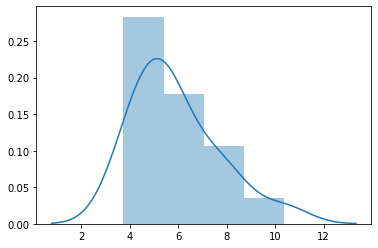

In [20]:
import seaborn as sns
sns.distplot(rank_only_std['value'].values.tolist())

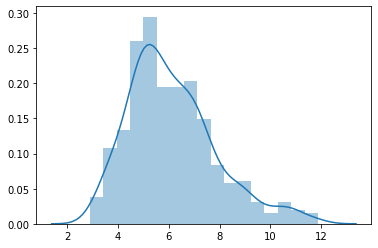

In [21]:
gpt2_std_list = gpt2_std['value'].values.tolist()
sns.distplot(gpt2_std_list)